<h1>Лабораторная работа №8</h1>
<h1>Анализ помех для разных типов антенн</h1>
<Bh3><p>Олейнкова Александра</p> Группа: НФИмд-01-20</Bh3>
<h2>Цель:</h2>
<Bh2>Исследование помех при разных типах антенн</Bh2>
<h3>Задание:</h3>
<Bh4>Используя табличные значения для углов направленности (Таблица 2,
для антенных решеток 64x1, 32x1) подберите коэффициент k для модели с основным
лепестком и потерями на боковые лепестки (формула 1, для каждой антенной
решетки), так чтобы получить наилучшую аппроксимацию коэффициентов
усиления G1, представленные в таблице 1. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
G1 = 57.51
alpha64 = 1.585 *np.pi/160
k = round(((2/G1) - (1-np.cos(alpha64/2)))/(1+np.cos(alpha64/2)),7)
print(k)
G2 = k*G1
print('G2  64x1:', G2)

0.0173288
G2  64x1: 0.9965792879999998


In [9]:
G1 = 28.76
alpha32 = 3.171*np.pi/160
k = round(((2/G1) - (1-np.cos(alpha32/2)))/(1+np.cos(alpha32/2)),7)
print(k)
G2 = k*G1
print('G2  32x1:', G2)

0.0345366
G2  32x1: 0.993272616


<h3>Задание:</h3>
<Bh4>Рассчитайте вероятность блокировки в двухмерной и трехмерной модели
для высоты базовой станции 10 м, высоты приемника 1.4 м, высоты человека 1.7 м.
В случае двухмерного сценария высоту базовой станции взять равной высоте
приемника. Построить график зависимости вероятностей от интенсивности
блокирующих объектов, оценить и сравнить полученные результаты. 

In [10]:
H_BazSt = 10
H_Priem = 1.4
H_Chelovek = 1.7

lamB = 1 # интенсивность в зоне покрытия
R = 2 # радиус
D = 3 # расстояние между приемниками

In [11]:
step = 0

L = []
P1 = []
P2 = []

for i in range(10):
    step += 0.1
    L.append(step)
    # Вероятности отсутствия блокировки
    P1.append(1 - np.exp(-2*step*R*D)) #R2
    P2.append(1 - np.exp(-2*step*R*(D*(H_Chelovek-H_Priem)/(H_BazSt-H_Priem) + R))) #R3

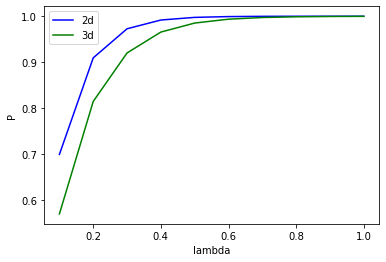

In [12]:
#Зависимость вероятностей от интенсивности блокирующих объектов
plt.plot(L,P1,'b-')
plt.plot(L,P2,'g-')

plt.legend(('2d','3d'))
plt.xlabel('lambda') #  интенсивность блокировки
plt.ylabel('P') # вероятность блокировки
plt.show()

<h3>Вывод</h3>
<Bh4> Вычислили вероятность блокировки в зависимости от антены и интенсивности блокаторов